# Hoja de Trabajo \# 2-2


---


por Josué Obregón <br>
DS6011 - Feature Engineering <br>
UVG Masters - Escuela de Negocios<br>


## Objetivos

El objetivo de esta hoja de trabajo  es presentar al estudiante diferentes técnicas de visualización de datos para ayudar a entender las características y el comportamiento de la variable objetivo en los modelos predictivos.

Así mismo, las técnicas también son útiles para entender la relación de las distintas variables predictoras, entre ellas mismas y con la variable objetivo.

Como objetivo adicional, también se busca que el estudiante conozca el funcionamiento de dos librerías de visualización de datos del lenguaje python: [Seaborn](https://seaborn.pydata.org/) y [Plotly express](https://plotly.com/python/plotly-express/).

El análisis presentado en esta hoja de trabajo está basado en la [sección 4.2](http://www.feat.engineering/visualizations-for-numeric-data-exploring-train-ridership-data.html) del libro del curso. Intentaremos generar las visualizaciones lo más fielmente posible a las presentadas en el libro.


## Importación de librerías y carga de los datos a varios pandas [DataFrames](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


Las librerías que importaremos para empezar son pandas y numpy para el manejo de los datos, y matplotlib, seaborn y plotly para la generación de visualizaciones. 

Los datos necesitan cierto preprocesamiento, pero el objetivo de esta hoja de trabajo no es ese, así que incluyo dos archivos extra. El primero es donde están registrados los días usados para el análisis, y el segundo son atributos creados por el autor del libro. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
!mkdir data

In [3]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq', # okc_train  https://drive.google.com/file/d/16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq/view?usp=sharing
        ]
outputs = ['okc_train.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=16AGQw1nM9NYILv2aSZaSNSn9jBPByWPq
To: /content/data/okc_train.csv
100%|██████████| 12.3M/12.3M [00:00<00:00, 39.7MB/s]


In [4]:
df = pd.read_csv('data/okc_train.csv',index_col=0)

In [5]:
df

,age,diet,drinks,drugs,education,height,income,last_online,offspring,pets,...,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile
1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.420945,other,1
4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,likes_cats,...,0,0,0,0,0,0,1,2.671173,other,3
6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,likes_cats,...,0,0,0,0,0,0,1,3.391112,stem,5
8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.090611,other,6
10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,1,3.382377,other,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,52,diet_missing,socially,never,graduated_from_college_university,70,missing,0,doesnt_want_kids,likes_dogs_and_has_cats,...,0,0,0,0,0,0,1,3.651666,other,51742
59943,24,mostly_anything,often,sometimes,working_on_college_university,72,missing,2,doesnt_have_kids,likes_dogs_and_likes_cats,...,0,0,0,0,1,0,1,3.475526,other,51744
59944,42,mostly_anything,not_at_all,never,graduated_from_masters_program,71,inc100000,4,doesnt_have_kids,pets_missing,...,0,0,0,0,0,0,0,3.265996,other,51745
59945,27,mostly_anything,socially,often,working_on_college_university,73,missing,8,doesnt_have_kids_but_wants_them,likes_dogs_and_likes_cats,...,0,0,0,0,0,0,0,3.298853,other,51746


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38809 entries, 1 to 59946
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               38809 non-null  int64  
 1   diet              38809 non-null  object 
 2   drinks            38809 non-null  object 
 3   drugs             38809 non-null  object 
 4   education         38809 non-null  object 
 5   height            38809 non-null  int64  
 6   income            38809 non-null  object 
 7   last_online       38809 non-null  int64  
 8   offspring         38809 non-null  object 
 9   pets              38809 non-null  object 
 10  religion          38809 non-null  object 
 11  sign              38809 non-null  object 
 12  smokes            38809 non-null  object 
 13  status            38809 non-null  object 
 14  where_state       38809 non-null  object 
 15  where_town        38809 non-null  object 
 16  religion_modifer  38809 non-null  object

In [7]:
df['drinks'].value_counts()

socially          27521
rarely             3981
often              3413
not_at_all         2157
drinks_missing     1208
very_often          319
desperately         210
Name: drinks, dtype: int64

In [8]:
df['diet'].value_counts()

diet_missing           14698
mostly_anything        11430
anything                4096
strictly_anything       3440
mostly_vegetarian       2313
mostly_other             700
strictly_vegetarian      588
vegetarian               448
strictly_other           304
mostly_vegan             220
other                    217
strictly_vegan           142
vegan                     82
mostly_kosher             59
mostly_halal              39
strictly_kosher           11
strictly_halal            10
kosher                     9
halal                      3
Name: diet, dtype: int64

<Axes: xlabel='drinks', ylabel='count'>

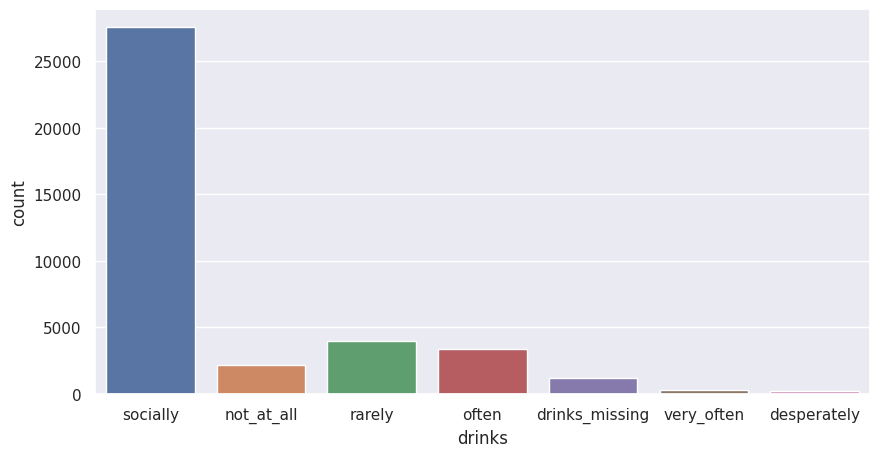

In [9]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='drinks')

In [10]:
df.Class.value_counts()

other    31642
stem      7167
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

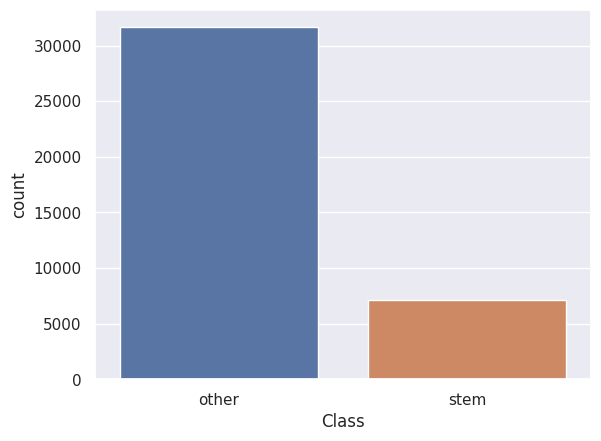

In [11]:
sns.countplot(data=df,x='Class')

## Gráfico de barras

El gráfico de barras es la forma más común de presentar conteos en variables categóricas. 

Utilizemos la categoría de religión para los primeros ejemplos.

Creamos el dataset del conteo de las dos clases (i.e., stem y other) por valor en la categoría de religion

In [12]:
bar_data = df.groupby(['religion','Class']).size().reset_index(name='counts') 

In [13]:
bar_data.head()

,religion,Class,counts
0,agnosticism,other,4590
1,agnosticism,stem,1411
2,atheism,other,3251
3,atheism,stem,1526
4,buddhism,other,1148


Presentamos un gráfico de barras particionado y coloreado por la categoría de la variable objetivo.

In [14]:
px.bar(data_frame=bar_data,
       x='religion', y='counts',
       color='Class', barmode='group',
       color_discrete_sequence=px.colors.sequential.Blues_r,
       width=800, height=400)

In [15]:
c = df.groupby(['religion','Class']).size().rename("counts")
bar_percentage_data = (c / c.groupby(level=0).sum()).reset_index(name='proportion')

In [16]:
bar_percentage_data.head()

,religion,Class,proportion
0,agnosticism,other,0.764873
1,agnosticism,stem,0.235127
2,atheism,other,0.680553
3,atheism,stem,0.319447
4,buddhism,other,0.844739


In [17]:
px.bar(data_frame=bar_percentage_data.sort_values(['Class','proportion'], ascending=[True,False]),
       x='religion', y='proportion',  
       color='Class',  color_discrete_sequence=px.colors.sequential.Blues_r,  
       width=800, height=400 )

In [18]:
# tomado de https://stackoverflow.com/a/34278277
# formula de la correccion en wikipedia https://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval#Wilson_score_interval 
def propci_wilson_cc(count, nobs, alpha=0.05):
    # get confidence limits for proportion
    # using wilson score method w/ cont correction
    # i.e. Method 4 in Newcombe [1]; 
    # verified via Table 1
    from scipy import stats
    n = nobs
    p = count/n
    q = 1.-p
    z = stats.norm.isf(alpha / 2.)
    z2 = z**2   
    denom = 2*(n+z2)
    num = 2.*n*p+z2-1.-z*np.sqrt(z2-2-1./n+4*p*(n*q+1))    
    ci_l = num/denom
    num = 2.*n*p+z2+1.+z*np.sqrt(z2+2-1./n+4*p*(n*q-1))
    ci_u = num/denom
    if p == 0:
        ci_l = 0.
    elif p == 1:
        ci_u = 1.
    return ci_l, ci_u


In [19]:
stem_rate = df['Class'].value_counts(normalize=True)['stem']
stem_rate

0.18467365817207348

In [20]:
binomial_data = bar_data.pivot(index='religion',columns='Class')
binomial_data.columns = binomial_data.columns.droplevel()
binomial_data.head(10)

Class,other,stem
religion,,
agnosticism,4590,1411
atheism,3251,1526
buddhism,1148,211
catholicism,2906,419
christianity,3486,488
hinduism,189,112
islam,69,20
judaism,1773,331
other,4786,646


In [21]:
proportion_data = []
for index, row in binomial_data.iterrows():    
  sum = row['other'] + row['stem']   
  stem_prop = row['stem'] / sum
  prop_test_ci_correction = propci_wilson_cc(row['stem'], nobs=sum)
  proportion_data.append([stem_prop, prop_test_ci_correction[0],prop_test_ci_correction[1]])

binomial_data= pd.concat([binomial_data, pd.DataFrame(proportion_data, columns=['stem_prop','lower_ci', 'upper_ci'],index=binomial_data.index)], axis=1)
binomial_data['y_minus'] = binomial_data.stem_prop - binomial_data.lower_ci
binomial_data['y_plus'] = binomial_data.upper_ci - binomial_data.stem_prop
binomial_data = binomial_data.sort_values('stem_prop')
binomial_data
  

,other,stem,stem_prop,lower_ci,upper_ci,y_minus,y_plus
religion,,,,,,,
other,4786,646,0.118925,0.110496,0.127898,0.008429,0.008974
christianity,3486,488,0.122798,0.112835,0.133498,0.009963,0.010700
catholicism,2906,419,0.126015,0.115020,0.137884,0.010995,0.011869
buddhism,1148,211,0.155261,0.136633,0.175870,0.018628,0.020609
judaism,1773,331,0.157319,0.142160,0.173747,0.015159,0.016427
religion_missing,9444,2003,0.174980,0.168086,0.182094,0.006894,0.007113
islam,69,20,0.224719,0.145786,0.327865,0.078933,0.103146
agnosticism,4590,1411,0.235127,0.224487,0.246109,0.010640,0.010982
atheism,3251,1526,0.319447,0.306271,0.332916,0.013176,0.013468


In [22]:
fig = px.scatter(data_frame=binomial_data,
                 x=binomial_data.index, y='stem_prop',
                 error_y='y_plus', error_y_minus='y_minus',
                 color_discrete_sequence =['black'],              
                 width=800, height=500)
fig.add_shape(type='line', xref='paper',
              x0=0, x1=1, yref='y', y0=stem_rate, y1=stem_rate,
              line={'dash':'dash','color':'red'},opacity=0.5)
fig.layout.template = 'plotly_white' 
fig.show()

## Relación entre variables numéricas y una salida categórica (clasificación)

En el archivo, el largo del ensayo está almacenado como el logaritmo del valor real. Por lo tanto, creamos una columna ona la función inversa, la función exponencial.

In [23]:
df['exp_essay_length'] = np.exp(df['essay_length'])

In [24]:
# fig = px.histogram(data_frame=df[['exp_essay_length','Class']],
#        x='exp_essay_length',facet_row='Class', log_x=True,  
#        width=800, height=500)
# fig.update_traces(xbins=dict( # bins used for histogram
#         start=0,
#         end=1e2,
#         size=6
#     ))
# fig.show()

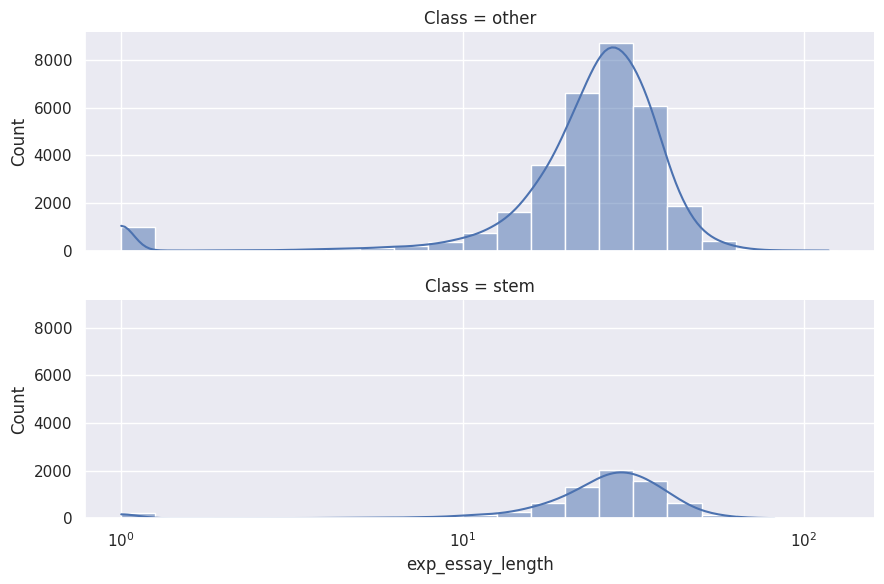

In [25]:
g = sns.FacetGrid(df[['exp_essay_length','Class']], row='Class', height=3, aspect=3)
g.map_dataframe(sns.histplot, x='exp_essay_length', log_scale=True, binwidth=0.1, kde='True')

### Utilizando un suavizador con splines de regresión

Utilizaremos una librería que no esta ya instalada en Google Colab. El nombre de la librería es [pyGAM](https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Introduction).



GAM (Generalized Additive Model por sus siglas en inglés) son modelos lineales generalizados en los cuales la variable respuesta depende lienalmente de una función suavizada de algunas de las variables predictoras. 

Primero la instalamos en nuestro servidor privado de Colab, utilizando el comando pip install pygam, antecedido con un simbolo de admiración !, para denotar que el comando debe ser ejecutado directamente en el sistema operativo y no en python 

In [26]:
!pip install pygam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [27]:
gam_data =  df[['essay_length','Class']].sort_values('essay_length').copy()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
gam_data.Class.unique()

array(['other', 'stem'], dtype=object)

In [30]:
encoder = LabelEncoder()
encoder.fit(gam_data['Class'])

LabelEncoder()

In [31]:
encoder.classes_

array(['other', 'stem'], dtype=object)

In [32]:
gam_data['class_cat'] =encoder.transform(gam_data['Class'])

In [33]:
gam_data.head()

,essay_length,Class,class_cat
7156,0.0,other,0
15096,0.0,other,0
40020,0.0,other,0
46189,0.0,other,0
15061,0.0,stem,1


In [34]:
from pygam import LogisticGAM, s

In [35]:
gam = LogisticGAM(s(0, n_splines=10), fit_intercept=True)
gam.gridsearch(np.expand_dims(gam_data['essay_length'].to_numpy(),axis=1),gam_data['class_cat'], lam=np.logspace(-3, 3, 11))
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      6.3883
Link Function:                        LogitLink Log Likelihood:                                -18473.7338
Number of Samples:                        38809 AIC:                                            36960.2443
                                                AICc:                                           36960.2475
                                                UBRE:                                               2.9525
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.005
Feature Function                  Lam

<ipython-input-35-45016756c89e>:3: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




In [36]:
gam_small = gam_data['essay_length'].unique()

In [37]:
gam_prob = gam.predict_mu(gam_small)
gam_prob

array([0.1751007 , 0.17588808, 0.17592145, ..., 0.17142949, 0.16918698,
       0.15297831])

In [38]:
gam_prob_ci = gam.confidence_intervals(gam_small)
gam_prob_ci

array([[0.15454531, 0.19775061],
       [0.14571989, 0.21076107],
       [0.13718836, 0.22276679],
       ...,
       [0.09692015, 0.2851339 ],
       [0.0942749 , 0.2849009 ],
       [0.07632607, 0.28302297]])

In [39]:
fig = px.scatter(x=gam_small,y=gam_prob, marginal_x='rug',
              #log_x=True,
        width=700, height=350)
fig.add_shape(type='line', xref='paper',x0=0,x1=1, yref='y', y0=stem_rate, y1=stem_rate,line={'dash':'dash', 'color':'red'},opacity=0.5)

fig.add_trace(
    go.Scatter(
        name='Upper Bound',
        x=gam_small,
        y=gam_prob_ci[:,1],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=1),
        showlegend=False,
    )
)
fig.add_trace(
    go.Scatter(
        name='Lower Bound',
        x=gam_small,
        y=gam_prob_ci[:,0],        
        marker=dict(color="#444"),
        line=dict(width=1),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
)
fig.data[0]['mode']='lines'
fig.layout.template = 'plotly_white' 
fig.show()

In [40]:
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu

In [41]:
ttest_ind(gam_data[gam_data.class_cat==0]['essay_length'],gam_data[gam_data.class_cat==1]['essay_length'])

Ttest_indResult(statistic=-7.128425530950063, pvalue=1.0329188421579002e-12)

In [42]:
mannwhitneyu(gam_data[gam_data.class_cat==0]['essay_length'],gam_data[gam_data.class_cat==1]['essay_length'])

MannwhitneyuResult(statistic=102439156.5, pvalue=1.961944865977473e-37)

In [43]:
gam_data[gam_data.class_cat==0]['essay_length'].mean()

3.120392184443245

In [44]:
gam_data[gam_data.class_cat==1]['essay_length'].mean()

3.1838904027585615

## Explorando Relaciones entre predictores categóricos

In [45]:
from statsmodels.graphics.mosaicplot import mosaic

In [46]:
dd_df = df[['drinks','drugs']]

In [47]:
dd_df.head()

,drinks,drugs
1,socially,never
4,socially,drugs_missing
6,socially,drugs_missing
8,socially,never
10,not_at_all,never


In [48]:
def return_emtpy(x):
  return ''

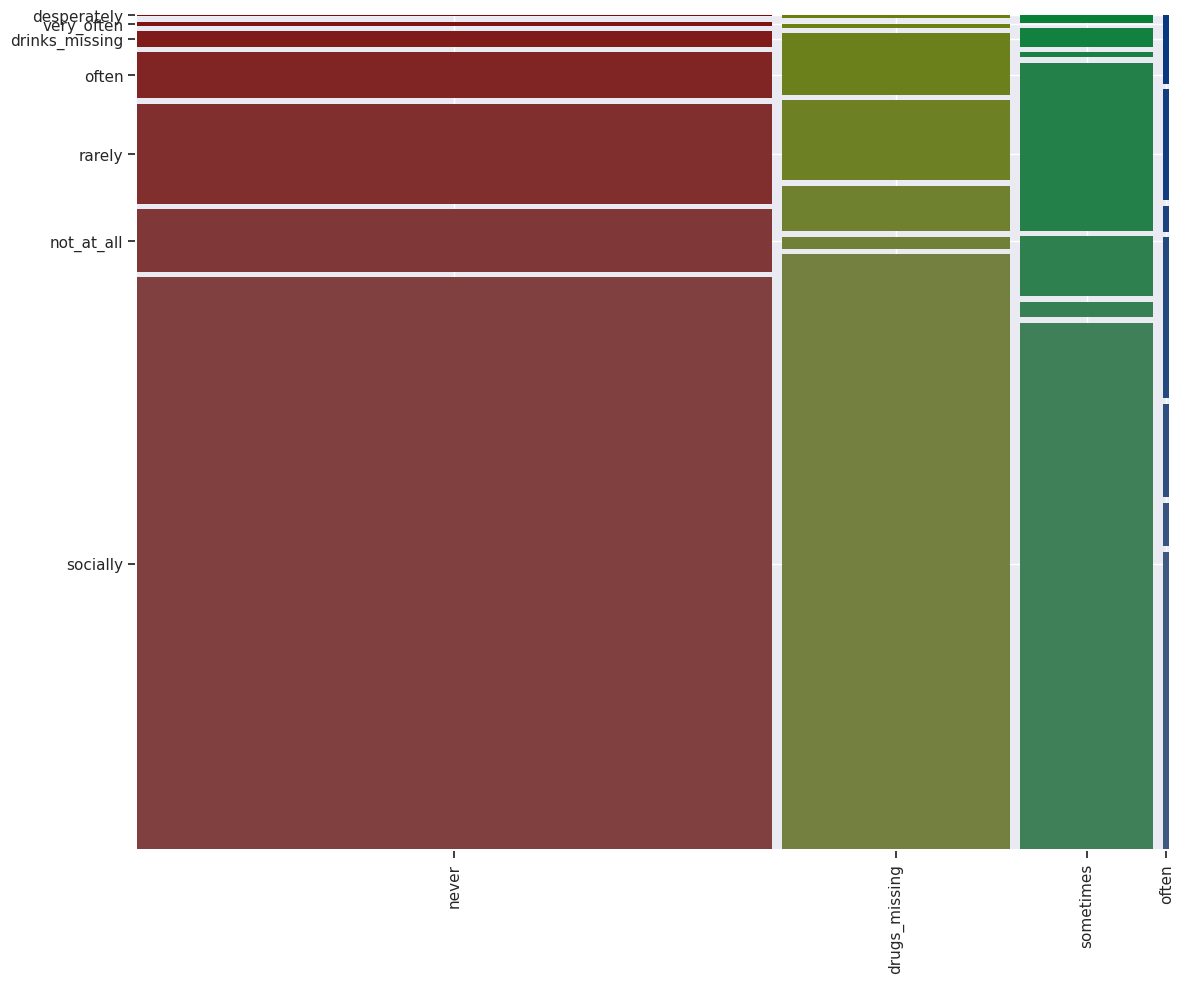

In [49]:
fig, ax = plt.subplots(figsize=(12,10))
#plt.figure(figsize=(6,6))
mosaic_fig = mosaic(dd_df,['drugs','drinks'], ax=ax, labelizer=return_emtpy, label_rotation=[90,0], gap=0.01)
plt.tight_layout()

## Análisis de correspondencias

El Análisis de Correspondencias es una técnica estadística que se utiliza para analizar, desde un punto de vista gráfico, las relaciones de dependencia e independencia de un conjunto de variables categóricas a partir de los datos de una tabla de contingencia.

Para este análisis vamos a utilizar el paquete [prince](https://github.com/MaxHalford/prince). 

In [50]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.6/414.6 kB 10.7 MB/s eta 0:00:00


In [51]:
from prince import CA,  plot
from prince.utils import make_labels_and_names
from scipy.stats import chi2_contingency

In [52]:
from collections import OrderedDict

GRAY = OrderedDict([
    ('light', '#bababa'),
    ('dark', '#404040')
])

def plot_coordinates2(ca_obj,X, ax=None, figsize=(6, 6), x_component=0, y_component=1,
                                   show_row_labels=True, show_col_labels=True, **kwargs):
        """Plot the principal coordinates."""

        

        if ax is None:
            fig, ax = plt.subplots(figsize=figsize)

        # Add style
        ax = plot.stylize_axis(ax)

        # Get labels and names
        row_label, row_names, col_label, col_names = make_labels_and_names(X)

        # Plot row principal coordinates
        row_coords = ca_obj.row_coordinates(X)
        ax.scatter(
            row_coords[x_component],
            -1*row_coords[y_component],
            **kwargs,
            label=row_label
        )

        # Plot column principal coordinates
        col_coords = ca_obj.column_coordinates(X)
        ax.scatter(
            col_coords[x_component],
            -1*col_coords[y_component],
            **kwargs,
            label=col_label
        )

        # Add row labels
        if show_row_labels:
            x = row_coords[x_component]
            y = -1*row_coords[y_component]
            for xi, yi, label in zip(x, y, row_names):
                ax.annotate(label, (xi, yi))

        # Add column labels
        if show_col_labels:
            x = col_coords[x_component]
            y = -1*col_coords[y_component]
            for xi, yi, label in zip(x, y, col_names):
                ax.annotate(label, (xi, yi))

        # Legend
        ax.legend()

        # Text
        ax.set_title('Principal coordinates')
        ei = ca_obj.cumulative_percentage_of_variance_ #explained_inertia_
        ax.set_xlabel('Component {} ({:.2f}% inertia)'.format(x_component, 100 * ei[x_component]))
        ax.set_ylabel('Component {} ({:.2f}% inertia)'.format(y_component, 100 * ei[y_component]))

        return ax

# def stylize_axis(ax, grid=True):

#     if grid:
#         ax.grid()

#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')

#     ax.axhline(y=0, linestyle='-', linewidth=1.2, color=GRAY['dark'], alpha=0.6)
#     ax.axvline(x=0, linestyle='-', linewidth=1.2, color=GRAY['dark'], alpha=0.6)

#     return ax

In [53]:
contingency_table = pd.crosstab(df.drugs,df.drinks)
contingency_table

drinks,desperately,drinks_missing,not_at_all,often,rarely,socially,very_often
drugs,,,,,,,
drugs_missing,51,681,134,875,502,6539,42
never,78,484,1909,1414,3065,17528,122
often,24,9,15,55,32,102,38
sometimes,57,34,99,1069,382,3352,117


Hacemos el test de indepenencia de variables de Chi-cuadrado con la tabla de contingencia

In [54]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}')
print(f'DoF: {dof}')
print(f'p-value: {p}')

Chi2: 4114.220766750219
DoF: 18
p-value: 0.0


In [55]:
ca = CA(n_components=3)
ca = ca.fit(contingency_table)

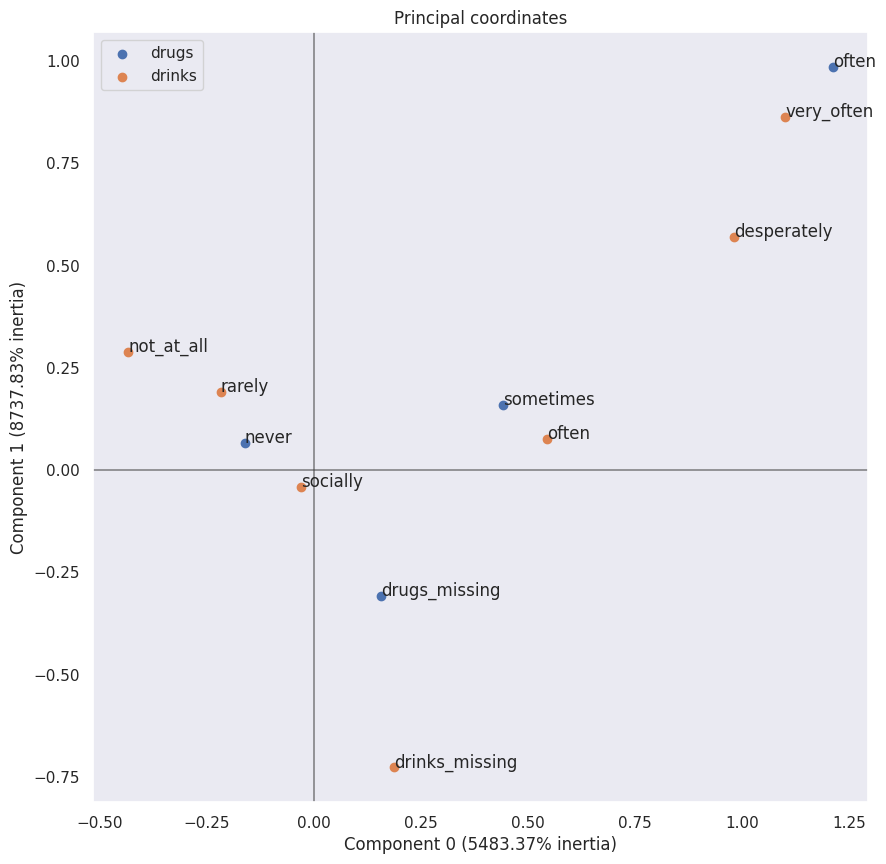

In [56]:
ax = plot_coordinates2(
     ca,
     X=contingency_table,
     ax=None,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
)

In [57]:
ca.plot(contingency_table)

alt.Chart(...)

In [58]:
ca.cumulative_percentage_of_variance_

array([ 54.83371035,  87.37827591, 100.        ])

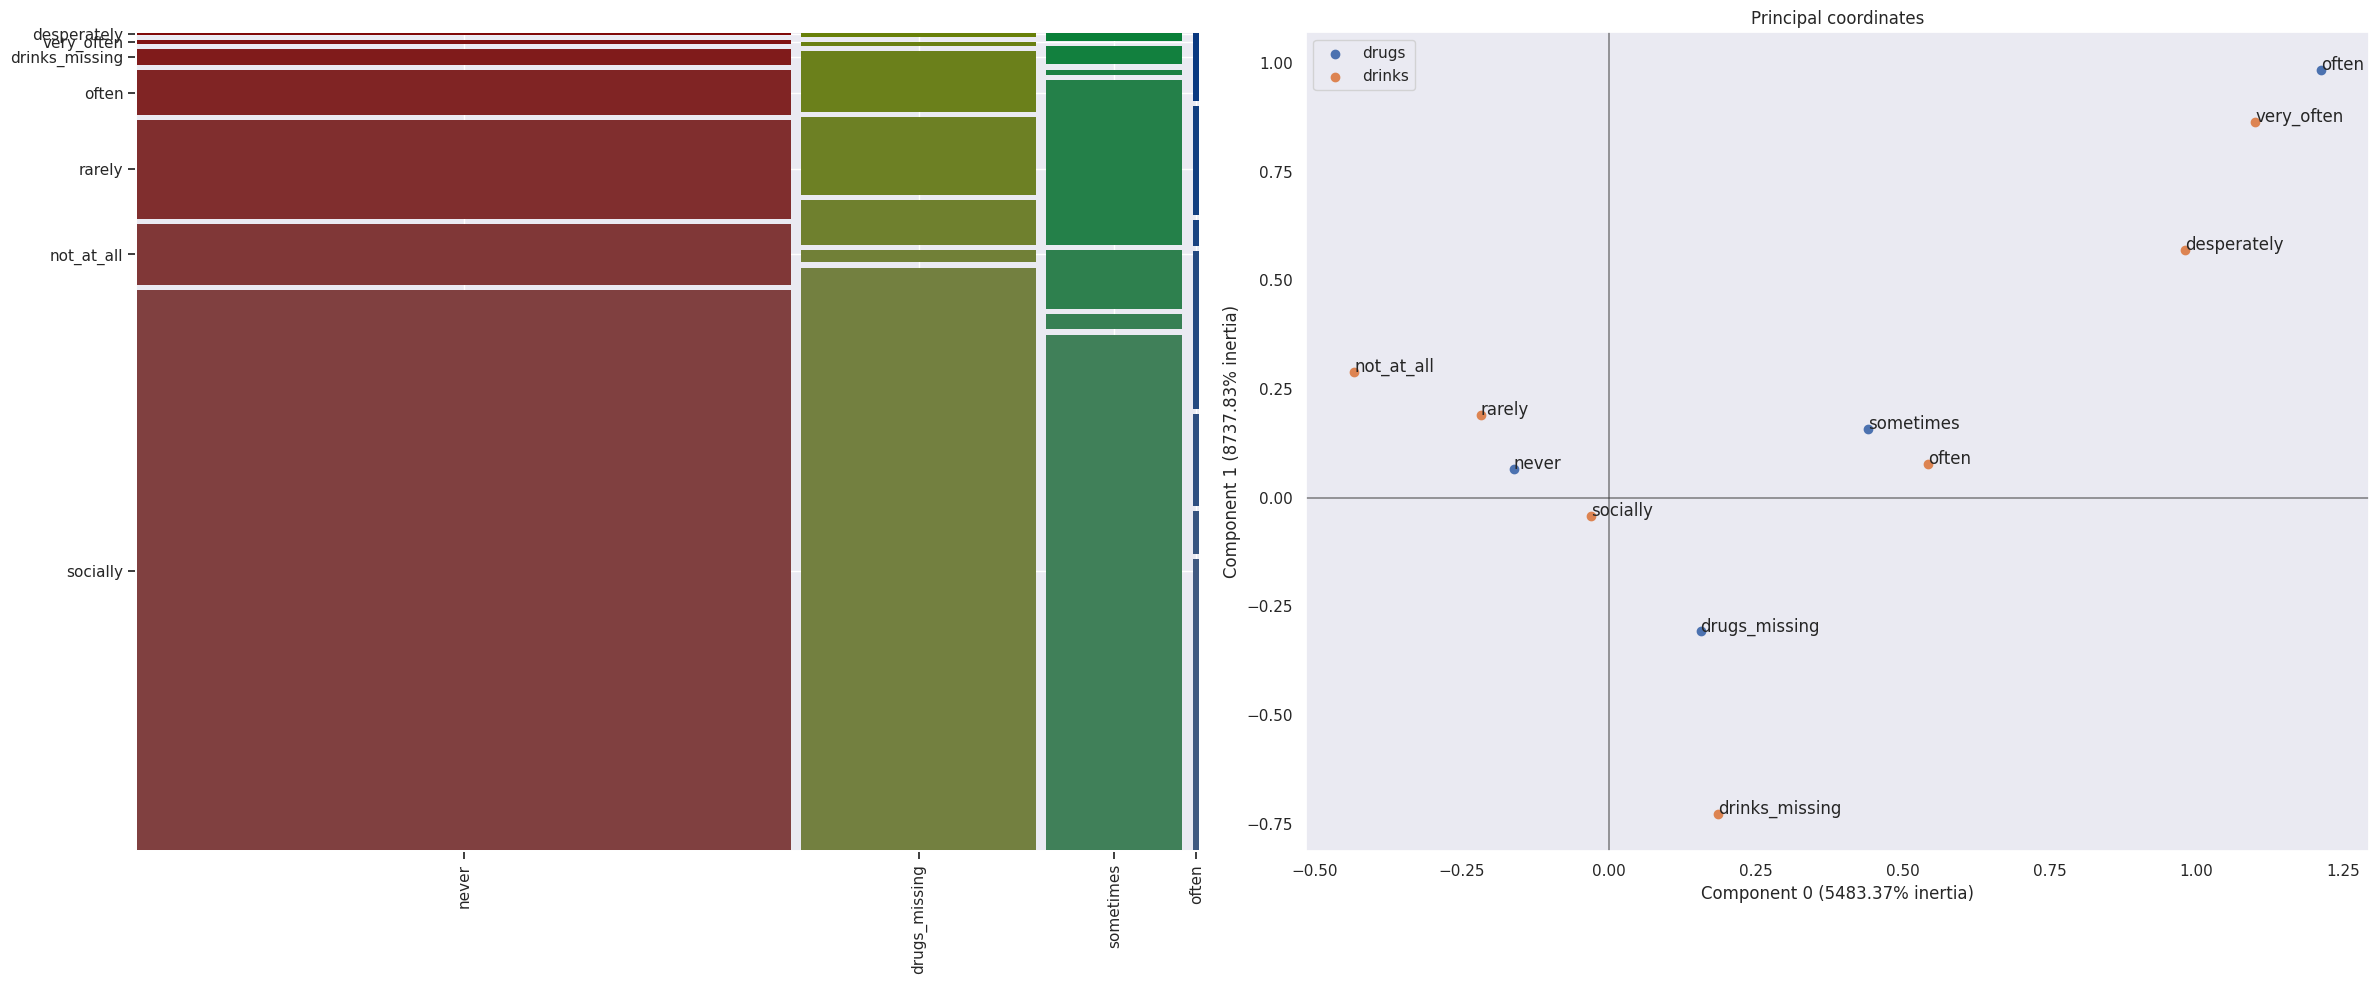

In [59]:
fig, (ax1,ax2) = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
mosaic_fig = mosaic(dd_df,['drugs','drinks'], ax=ax1, labelizer=return_emtpy, label_rotation=[90,0], gap=0.01)
plot_coordinates2(
     ca,
     X=contingency_table,
     ax=ax2,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
)
plt.tight_layout()